## Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import sparse
import timeit
import matplotlib.pyplot as plt

## load csv into dense matrix, then converts it to sparse matrix
If "res/sparse_training.data" exists, **DO NOT** run cell as it will take awhile

In [2]:
def load_matrix():
    dense_matrix = np.zeros(shape=(21, 61188), dtype=np.int16)
    with open('../res/training.csv', 'r') as train_stream:
        for i, line in enumerate(train_stream):
            line_int = np.array(list(map(int, line.split(','))), dtype=np.int16)
            doc_label = line_int[-1]
            dense_matrix[doc_label] += line_int[1:-1]
            print(i)
        sparse_training = sparse.csr_matrix(dense_matrix)
        sparse.save_npz('../res/sparse_training.data',sparse_training)
        
# load_matrix()

## load the sparse matrix

In [2]:
sparse_training_data = sparse.load_npz('../res/sparse_training.data.npz')
# print(sparse_training_data[21, 3])  
print(sparse_training_data)

  (1, 0)	9
  (1, 1)	53
  (1, 2)	237
  (1, 3)	11
  (1, 4)	48
  (1, 5)	36
  (1, 6)	7
  (1, 7)	1
  (1, 8)	31
  (1, 9)	127
  (1, 10)	5
  (1, 11)	4336
  (1, 12)	19
  (1, 13)	24
  (1, 14)	46
  (1, 15)	597
  (1, 16)	267
  (1, 17)	12
  (1, 18)	9
  (1, 19)	15
  (1, 20)	2
  (1, 21)	3
  (1, 22)	2985
  (1, 23)	4
  (1, 24)	325
  :	:
  (20, 61146)	1
  (20, 61147)	1
  (20, 61148)	1
  (20, 61149)	2
  (20, 61150)	1
  (20, 61151)	1
  (20, 61152)	1
  (20, 61153)	1
  (20, 61154)	1
  (20, 61169)	2
  (20, 61170)	2
  (20, 61171)	2
  (20, 61172)	3
  (20, 61173)	4
  (20, 61174)	2
  (20, 61175)	3
  (20, 61176)	6
  (20, 61177)	1
  (20, 61178)	2
  (20, 61179)	2
  (20, 61183)	2
  (20, 61184)	2
  (20, 61185)	2
  (20, 61186)	2
  (20, 61187)	2


## Creating global vars and consts

In [3]:
UNIQUE_VOCAB = 61188
TOTAL_VOCAB = sparse_training_data.sum()

# the pxs used for mutual information
pxs = np.zeros(61188, dtype=np.float)
pxs_initialized=False

set_list = [set() for x in range(0, 20)]
class_row_dict = dict(zip(list(range(1, 21)), set_list))

## Counting Priors and words

In [4]:
def count_priors():
    word_id_ranges = list(range(1, 61189))
    column_names =  ['doc_id'] + word_id_ranges + ['label']
    p_counts = np.zeros(21, dtype=np.int16)
    for i, data_chunk in enumerate(pd.read_csv('../res/training.csv', header=None, chunksize=200, names=column_names, usecols=['label'])): 
        for _, row in data_chunk.iterrows():
            current_label = row['label']
            class_row_dict[current_label].add(i)
            i += 1
    
    for j in range(1, 21):
        p_counts[j] = len(class_row_dict[j])
    
    return p_counts / p_counts.sum()

prior_counts = count_priors()
print(prior_counts) 

[0.         0.04844692 0.05053315 0.05006954 0.05146036 0.04798331
 0.05146036 0.05215577 0.05238758 0.05076495 0.04983774 0.05146036
 0.04983774 0.04937413 0.05006954 0.05053315 0.05099675 0.05006954
 0.05146036 0.04612888 0.04496987]


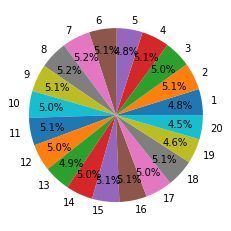

In [16]:
#making the pychart
_=plt.pie(prior_counts[1:], labels=list(range(1,21)), autopct="%1.1f%%", pctdistance=0.75)

### Calculating Px|Y used for both Question 6 and also Fast NB 

In [19]:
#Calculate Pxgy
MUTUAL_BETA= 0.004
pxgy = np.array(sparse_training_data.todense(), dtype=np.float)
total_words = {}
for i in range(1, 21):
    total_words[i] = pxgy[i].sum()
    pxgy[i]  = (pxgy[i] + MUTUAL_BETA) / (total_words[i] + (MUTUAL_BETA * TOTAL_VOCAB))

## Mutual Information

### Most Useful and lease useful words in the whole document. Using entropy

In [20]:
xjointy = pxgy.copy()
enthropy = np.zeros(61188)
for i in range(1, 21):
    xjointy[i] *= prior_counts[i]
for i in range(61188):
    marginal_val = xjointy[:,i].sum()
    enthropy[i] =  marginal_val * np.log2(marginal_val)
sorted_indices = enthropy.argsort()
vocab_df = pd.read_csv('../res/vocabulary.txt', sep='\n', header=None, names=["word"])
print("Most usefull words!")
for x in sorted_indices[-100:][::-1]:
    print(vocab_df.iloc[x]['word'])
    
print("\n----------------------------------")
print("useless words:\n")
for x in sorted_indices[:100]:
    print(vocab_df.iloc[x]['word'])


Most usefull words!
doves
uxarch
amphiboly
unipress
equivocation
vaxstation
stellix
joanne
newbauer
lewart
allbery
wjh
xgoodies
pierces
muscularly
totty
listname
xew
slit
libwxm
antiquitam
crumenam
univision
adnt
ncsuvm
chirurgie
boutilie
xware
netoprwa
kck
poop
emits
doleh
conor
giza
shite
sinkhole
reification
nuucp
usrx
baruch
quinton
favourating
ehm
moondog
fileselector
ryner
tamm
wergo
foolishly
xpic
serverses
navigations
hangspace
convenients
respectedly
divaev
rusian
fsck
ifconfig
mxterm
ziemans
woodlice
moonsoft
chiquita
scherf
multilist
stna
causa
dgac
michanek
searle
bouron
connolly
xcrichtext
equivalently
thyme
ignorantium
xmt
dovetail
ceilidh
arguer
multidrop
smebsb
wccreate
wcchildren
nssl
unpacking
conformant
hotbed
cwm
pswm
jbis
carlotto
championed
hoagland
facelike
kerwin
prather
tycchow

----------------------------------
useless words:

the
to
of
and
in
is
that
it
for
you
on
this
have
be
with
not
are
or
as
if
but
edu
they
was
can
from
at
my
by
an
there
what
all
will
wo

### The following cell calculates the mutual information per document class

In [24]:
#calculates the p(X=xi) for all words
def create_px():
    global pxs_initialized
    if not pxs_initialized:
        print('generating all pxs this takes a few seconds')
        for i in range(61188):
            pxs[i] = sparse_training_data[:,i].sum()/TOTAL_VOCAB
        pxs_initialized = True
        print('pxs calculation complete!')    
    else:
        print('pxs were calculated before. returning the result')
        
# calculates the mutual information for all categories using the formula
# MI = P(x,y) + log(p(x,y)/(p(x).p(y)))
def calc_mutual():
    create_px()
    mutual_info = sparse_training_data.copy()
    mutual_results = sparse.csr_matrix(np.zeros((21,61188)), dtype=np.float32)
    non_zero_dict={}
    for i in range(1,21):
        row = mutual_info[i]
        total_words = row.sum()
        # print(row.shape)
        non_zeros = mutual_info[i].nonzero()[1]
        non_zero_dict[i] = non_zeros
        # p(x|y)
        pxgy = row.multiply(1/total_words)
        pxy = pxgy.multiply(prior_counts[i])
        pxgy[0, non_zeros] = np.log1p(pxgy[0,non_zeros].multiply(1/pxs[non_zeros]))
        mutual_results[i, non_zeros] = pxy[0, non_zeros] + pxgy[0, non_zeros]
    return mutual_results

def print_mutual_results(mutual_results, vocab_df, doc_class_df, top_words=5):
    results_dense =  mutual_results.todense()
    best_words=["x"] * top_words
    worst_words = ["x"] * top_words
    for i in range(1, 21):
        row_dense = results_dense[i]
        arg_maxes = row_dense.argsort()
        print(doc_class_df.iloc[i-1]['doc_class'])
        best_indices = arg_maxes[0,-top_words:][::-1]
        worst_indices = arg_maxes[0,:top_words]
        for ii in range(top_words):
            best_index = best_indices[0,ii]
            worst_index = worst_indices[0,ii]
            best_words[ii] = vocab_df.iloc[best_index].word
            worst_words[ii] = vocab_df.iloc[worst_index].word
        print('most useful words')
        print(best_words)
        print('least useful words')
        print(worst_words)

print("ignore warnings!")
mutual_results = calc_mutual()

ignore warnings!
pxs were calculated before. returning the result


/home/sahba/programFiles/miniconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:118: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/sahba/programFiles/miniconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:118: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/sahba/programFiles/miniconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:118: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/sahba/programFiles/miniconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:118: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/hom

### The following cell analyzes the mutual information calculations per document class

In [25]:
vocab_df = pd.read_csv('../res/vocabulary.txt', sep='\n', header=None, names=["word"])
doc_class_df = pd.read_csv('../res/newsgrouplabels.txt', sep='\n', header=None, names=["doc_class"])
#loading
print_mutual_results(mutual_results, vocab_df, doc_class_df)

1 alt.atheism
most useful words
['darice', 'buphy', 'bobbe', 'beauchaine', 'mozumder']
least useful words
['vijay', 'elaine', 'magnetometer', 'typ', 'jjj']
2 comp.graphics
most useful words
['nfotis', 'radiosity', 'siggraph', 'pov', 'rayshade']
least useful words
['vijay', 'scuttle', 'definetly', 'rectifies', 'chops']
3 comp.os.ms-windows.misc
most useful words
['ashok', 'louray', 'vgalogo', 'qw', 'rlk']
least useful words
['vijay', 'recommending', 'coords', 'microwaves', 'surveyors']
4 comp.sys.ibm.pc.hardware
most useful words
['fasst', 'jmarttila', 'usma', 'rll', 'fdisk']
least useful words
['vijay', 'emisions', 'eaton', 'woodard', 'juhan']
5 comp.sys.mac.hardware
most useful words
['adb', 'iivx', 'bmug', 'lciii', 'iisi']
least useful words
['vijay', 'demondulator', 'downconversion', 'ackermann', 'inverting']
6 comp.windows.x
most useful words
['argv', 'oname', 'ndet', 'xdm', 'args']
least useful words
['vijay', 'rafters', 'entrances', 'nmw', 'furnace']
7 misc.forsale
most useful wo

## Naive Bayes
formula from the proj2 PDF

In [16]:
def multinomial_naive_bayes(row, row_total_words, beta, debug_prints = False)->int:
    if debug_prints: print(row_total_words, row)

    max_prob_class = [float('-inf'), -1]
    for doc_label in range(1, 21):
        map_denom = sparse_training_data[doc_label].sum() + (beta * TOTAL_VOCAB)
        running_sum = 0
        for word_i, num_words_at_i in row:
            running_sum += np.log2((sparse_training_data[doc_label, word_i] + beta)/map_denom)
        posterior = np.log2(prior_counts[doc_label]) + running_sum
        if posterior > max_prob_class[0]:
            max_prob_class[0] = posterior
            max_prob_class[1] = doc_label

    if debug_prints: print(max_prob_class)
    return max_prob_class[1]

In [ ]:
def bernoulli_naive_bayes(row, row_total_words, beta, debug_prints = False)->int:
    return 0

### Training Test

In [8]:
def test_training(bayes_function, beta):
    sparse_matrix = sparse.load_npz('../res/nb_training_data.npz')
    training_data_coo = sparse_matrix.tocoo()

    row_total_words = training_data_coo.A.sum(axis=1)
    correct = 0
    row = []
    row_i = 0
    for row_i, word_i, val in zip(training_data_coo.row, training_data_coo.col, training_data_coo.data):
        if word_i != 61188:
            row.append((word_i, val))
        else:
            classification = bayes_function(row, row_total_words[row_i] - val, beta=b)
            correct += 1 if classification == val else 0
            row.clear()
            if not row_i % 500:
                print('At row:', row_i)
    print("Finished")
    print(f"accuracy: {(correct / row_i) * 100}%")

## Classification and Writing

In [9]:
def test_and_write(bayes_function, write_path, beta):
    sparse_matrix = sparse.load_npz('../res/nb_testing_data.npz')
    testing_data_coo = sparse_matrix.tocoo()
    with open(write_path, 'w') as out_stream:
        out_stream.write("id,class\n")
    
        row_total_words = testing_data_coo.A.sum(axis=1)
        row_offset = 12000
        current_row = 12000
        row = []
        for row_i, word_i, num_words_at_i in zip(testing_data_coo.row + row_offset, testing_data_coo.col, testing_data_coo.data):
            if row_i == current_row:
                row.append((word_i, num_words_at_i))
            else:
                predicted_label = bayes_function(row, row_total_words[row_i - row_offset], beta=b)
                out_stream.write(f'{row_i},{predicted_label}\n')
                row.clear()
                current_row = row_i
                if not current_row % 500:
                    print('At row:', current_row)
    print("File written")

## Testing
- multinomial

In [12]:
b = .0041 # BETA: Tried -> 1/TOTAL_VOCAB, .00001, .0001, .001, .01, .1, 1

In [ ]:
start = timeit.default_timer()

print('beta:', b)
test_training(multinomial_naive_bayes, beta=b)

stop = timeit.default_timer()
print('Time: ', (stop - start) / 60, 'minutes.') 

In [17]:
start = timeit.default_timer()

print('beta:', b)
file_path = '../results/multinomial_NB_b' + str(b)[(2 if b < 1 else 0) :] +'_results.csv'
test_and_write(multinomial_naive_bayes, file_path, beta=b)

stop = timeit.default_timer()
print('Time: ', (stop - start) / 60, 'minutes.') 

beta: 0.0041
At row: 12500
At row: 13000
At row: 13500
At row: 14000
At row: 14500
At row: 15000
At row: 15500
At row: 16000
At row: 16500
At row: 17000
At row: 17500
At row: 18000
At row: 18500
File written
Time:  26.004021093333332 minutes.


## Plots

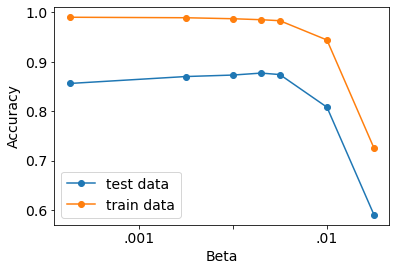

In [50]:
from matplotlib.ticker import StrMethodFormatter

def plot_q2():
    betas_x = [1/TOTAL_VOCAB, .0001, .001, .004, .01, .1, 1]
    test_accuracies_y = [.856, .87, .873, .877, .874, .808, .59]
    train_accuracies_y = [.99, .989, .987, .985, .983, .944, .725]
    
    plt.rcParams.update({'font.size': 14})
    fig, ax = plt.subplots()
    ax.semilogx(betas_x, test_accuracies_y, betas_x, train_accuracies_y, marker='o')
    
    ax.legend(['test data', 'train data'])
    plt.xlabel('Beta')
    plt.ylabel('Accuracy')
    
    plt.savefig('../res/betas_acc.png', bbox_inches='tight', pad_inches=0.3)

plot_q2()